https://www.datacamp.com/courses/pandas-foundations
# 1. Indexing time series: within the read_csv function
- parsedates=True
- index_col='Date'

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

## 1) change data format into time series

In [124]:
sales = pd.read_csv('datasets/sales-feb-2015.csv', parse_dates=True, index_col='Date')
sales.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


In [75]:
type(sales.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [76]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-26 08:57:45 to 2015-02-21 20:41:47
Data columns (total 3 columns):
Company    20 non-null object
Product    20 non-null object
Units      20 non-null int64
dtypes: int64(1), object(2)
memory usage: 640.0+ bytes


## 2) Selecting single datetime:
- loc['xx','xx]: slice by row, then by column

In [77]:
# Select a time period
sales.loc['2015-02-19 10:00:00':'2015-02-19 11:00:00','Company']

Date
2015-02-19 10:59:33    Mediacore
Name: Company, dtype: object

In [78]:
# Select whole day
sales.loc['2015-2-5']

,Company,Product,Units
Date,,,
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-05 22:05:03,Hooli,Service,10


In [79]:
# select partial datetime
sales.loc['Feb 5, 2015']

,Company,Product,Units
Date,,,
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-05 22:05:03,Hooli,Service,10


In [80]:
sales.loc['2015-FEb-5']

,Company,Product,Units
Date,,,
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-05 22:05:03,Hooli,Service,10


In [81]:
sales.loc['2015-2'].head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


In [82]:
sales.loc['2015'].head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


## 3) Convert strings to datatime
- pd.to_datetime([ ])
- df.reindex( ): reindexing involves providing a new index & matching data as required. If there's no matching entries, it would be filled by NaN by default.

In [83]:
abc = pd.to_datetime(['2015-2-11 20:03:08', '2015-2-11 21:00', '2015-2-11 22:50:44', '2015-2-11 23:00'])
abc

DatetimeIndex(['2015-02-11 20:03:08', '2015-02-11 21:00:00',
               '2015-02-11 22:50:44', '2015-02-11 23:00:00'],
              dtype='datetime64[ns]', freq=None)

## 4) Filling missing values

In [84]:
sales.reindex(abc, fill_value='missing')

,Company,Product,Units
2015-02-11 20:03:08,Initech,Software,7
2015-02-11 21:00:00,missing,missing,missing
2015-02-11 22:50:44,Hooli,Software,4
2015-02-11 23:00:00,missing,missing,missing


# 2. Resampling time series data
- downsampling: reduce datetime rows to slower frequency, like going from daily to weekly.
- upsampling: increase datetime rows to faster frequency, like going from daily to hourly.
- df.resample('D').mean(): daily mean. 'D' refers to daily.
## 1) Downsampling:

In [95]:
sales.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


In [98]:
# daily mean: D refers to daily. The resample method is chained with the mean method.
daily = sales.resample('D').mean()
daily.head()

,Units
Date,
2015-02-02,6.0
2015-02-03,13.0
2015-02-04,13.5
2015-02-05,14.5
2015-02-06,NaN


In [101]:
daily.loc['2015-2-4']

Units    13.5
Name: 2015-02-04 00:00:00, dtype: float64

In [102]:
sales.loc['2015-2-4', 'Units']

Date
2015-02-04 21:52:45    14
2015-02-04 15:36:29    13
Name: Units, dtype: int64

In [103]:
sales.loc['2015-2-4', 'Units'].mean()

13.5

In [107]:
# chain resample with the sum method to get daily totals
daily_total = sales.resample('D').sum()
daily_total.head()

,Units
Date,
2015-02-02,12
2015-02-03,13
2015-02-04,27
2015-02-05,29
2015-02-06,0


In [108]:
sales.resample('D').sum().max()

Units    29
dtype: int64

Count the # of separate sales made each week in Feb: 'W' means weekly

resample(' '): 
- min, or T: minute
- H: hour
- D: day
- B: business day
- M: month
- Q: quarter
- A: annual, year

In [110]:
sales.resample('W').count()

,Company,Product,Units
Date,,,
2015-02-08,8,8,8
2015-02-15,4,4,4
2015-02-22,5,5,5
2015-03-01,3,3,3


Multiplying frequencies

In [111]:
sales.loc[:, 'Units'].resample('2W').sum()

Date
2015-02-08    82
2015-02-22    79
2015-03-08    15
Freq: 2W-SUN, Name: Units, dtype: int64

## 2) Upsampling:

In [112]:
twodays = sales.loc['2015-2-4':'2015-2-5', 'Units']
twodays

Date
2015-02-05 01:53:06    19
2015-02-04 21:52:45    14
2015-02-05 22:05:03    10
2015-02-04 15:36:29    13
Name: Units, dtype: int64

In [113]:
type(twodays)

pandas.core.series.Series

### We use resample with the '4H' input argument to sample every 4 hours. This is called interpolation. We can also use bfill or other methods.

In [116]:
twodays.resample('4H').ffill()

Date
2015-02-04 12:00:00     NaN
2015-02-04 16:00:00    13.0
2015-02-04 20:00:00    13.0
2015-02-05 00:00:00    14.0
2015-02-05 04:00:00    19.0
2015-02-05 08:00:00    19.0
2015-02-05 12:00:00    19.0
2015-02-05 16:00:00    19.0
2015-02-05 20:00:00    19.0
Freq: 4H, Name: Units, dtype: float64

# Practice 1: 
## 1) Resampling & frequency

In [125]:
austin = pd.read_csv('datasets/weather_data_austin_2010.csv', parse_dates=True, index_col='Date')
austin.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [133]:
austin_6h = austin.Temperature.resample('6H').mean()
austin_6h.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

In [134]:
austin_daily = austin.Temperature.resample('D').count()
austin_daily.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

In [139]:
august = austin.Temperature.loc['August 2010']
august.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

In [141]:
august_max = august.resample('D').max()
august_max.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

In [142]:
february = austin.Temperature.loc['Feb 2010']
february.head()

Date
2010-02-01 00:00:00    47.8
2010-02-01 01:00:00    46.8
2010-02-01 02:00:00    46.1
2010-02-01 03:00:00    45.5
2010-02-01 04:00:00    44.9
Name: Temperature, dtype: float64

In [144]:
february_min = february.resample('D').min()
february_min.head()

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64

## 2) Rolling mean & frequency

In [153]:
unsmoothed = austin.Temperature['2010-Aug-1':'2010-Aug-15']
unsmoothed.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

In [154]:
type(unsmoothed)

pandas.core.series.Series

### Series.rolling(window=xx): to use the .rolling( ) method, you must always use method chaining.

In [152]:
smoothed = unsmoothed.rolling(window=24).mean()
smoothed.head(25)

Date
2010-08-01 00:00:00          NaN
2010-08-01 01:00:00          NaN
2010-08-01 02:00:00          NaN
2010-08-01 03:00:00          NaN
2010-08-01 04:00:00          NaN
2010-08-01 05:00:00          NaN
2010-08-01 06:00:00          NaN
2010-08-01 07:00:00          NaN
2010-08-01 08:00:00          NaN
2010-08-01 09:00:00          NaN
2010-08-01 10:00:00          NaN
2010-08-01 11:00:00          NaN
2010-08-01 12:00:00          NaN
2010-08-01 13:00:00          NaN
2010-08-01 14:00:00          NaN
2010-08-01 15:00:00          NaN
2010-08-01 16:00:00          NaN
2010-08-01 17:00:00          NaN
2010-08-01 18:00:00          NaN
2010-08-01 19:00:00          NaN
2010-08-01 20:00:00          NaN
2010-08-01 21:00:00          NaN
2010-08-01 22:00:00          NaN
2010-08-01 23:00:00    84.350000
2010-08-02 00:00:00    84.354167
Name: Temperature, dtype: float64

In [157]:
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})
august.head(5)

,smoothed,unsmoothed
Date,,
2010-08-01 00:00:00,NaN,79.0
2010-08-01 01:00:00,NaN,77.4
2010-08-01 02:00:00,NaN,76.4
2010-08-01 03:00:00,NaN,75.7
2010-08-01 04:00:00,NaN,75.1


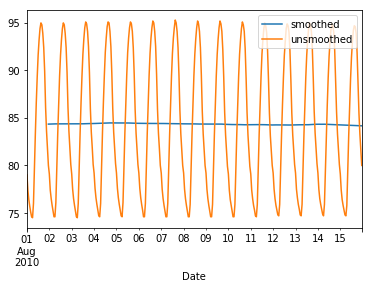

In [161]:
august.plot()
plt.show()

In [163]:
daily_max = august.resample('D').max()
daily_max.head()

,smoothed,unsmoothed
Date,,
2010-08-01,84.350000,95.0
2010-08-02,84.375000,95.0
2010-08-03,84.412500,95.1
2010-08-04,84.475000,95.1
2010-08-05,84.479167,95.1


In [164]:
daily_max_smoothed = daily_max.rolling(window=7).mean()
daily_max_smoothed

,smoothed,unsmoothed
Date,,
2010-08-01,NaN,NaN
2010-08-02,NaN,NaN
2010-08-03,NaN,NaN
2010-08-04,NaN,NaN
2010-08-05,NaN,NaN
2010-08-06,NaN,NaN
2010-08-07,84.421429,95.114286
2010-08-08,84.425595,95.142857
2010-08-09,84.422619,95.171429


# 3. Manipulating time series data

In [169]:
# we use the default range as index
sales1 = pd.read_csv('datasets/sales-feb-2015.csv', parse_dates=['Date'])
sales1.head()

,Date,Company,Product,Units
0,2015-02-26 08:57:45,Streeplex,Service,4
1,2015-02-16 12:09:19,Hooli,Software,10
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-02 08:33:01,Hooli,Software,3
4,2015-02-25 00:29:00,Initech,Service,10


In [170]:
type(sales1.Date)

pandas.core.series.Series

### 1) Series.str method:
- Series.str.upper( )
- Series.str.contains(' ')

In [175]:
# change the column values to upper case
sales1.Company.str.upper().head()

0    STREEPLEX
1        HOOLI
2      INITECH
3        HOOLI
4      INITECH
Name: Company, dtype: object

In [177]:
sales1.Product.str.contains('ware')

0     False
1      True
2      True
3      True
4     False
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15    False
16     True
17     True
18     True
19     True
Name: Product, dtype: bool

### 2) Boolean values
- True: 1
- False: 0

In [178]:
sales1.Product.str.contains('ware').sum()

14

### 3) Datetime transformations: 
- Series.dt.hour

In [181]:
# extract the hour of the day from the Date column with .dt.hour
sales1.Date.dt.hour

0      8
1     12
2     14
3      8
4      0
5      1
6      8
7     20
8     21
9     13
10    22
11    22
12     8
13    22
14    15
15    16
16    10
17    20
18     5
19    20
Name: Date, dtype: int64

### 4) Set timezone: Series.dt.tz_localize(' ')
- US/Central
- US/Eastern
- US/Pacific

In [185]:
# e.g. a company is Texas_based. Convert it to US/Central
texas_based = sales1.Date.dt.tz_localize('US/Central')
texas_based.head()

0   2015-02-26 08:57:45-06:00
1   2015-02-16 12:09:19-06:00
2   2015-02-03 14:14:18-06:00
3   2015-02-02 08:33:01-06:00
4   2015-02-25 00:29:00-06:00
Name: Date, dtype: datetime64[ns, US/Central]

In [187]:
eastern = sales1.Date.dt.tz_localize('US/Eastern')
eastern.head()

0   2015-02-26 08:57:45-05:00
1   2015-02-16 12:09:19-05:00
2   2015-02-03 14:14:18-05:00
3   2015-02-02 08:33:01-05:00
4   2015-02-25 00:29:00-05:00
Name: Date, dtype: datetime64[ns, US/Eastern]

In [189]:
sales1.Date.dt.tz_localize('US/Central').dt.tz_convert('US/Eastern').head()

0   2015-02-26 09:57:45-05:00
1   2015-02-16 13:09:19-05:00
2   2015-02-03 15:14:18-05:00
3   2015-02-02 09:33:01-05:00
4   2015-02-25 01:29:00-05:00
Name: Date, dtype: datetime64[ns, US/Eastern]

### Upsample: interpolate missing data
- df.resample(' ').first( )
- df.resample(' ').first( ).interpolate('linear'): yields a smooth time series

In [193]:
# date in ISO 8601 format
pop = pd.read_csv('datasets/world_population.csv', parse_dates=True, index_col='Date')
pop

,Total Population
Date,
2060-12-31,3034970564
1970-12-31,3684822701
1980-12-31,4436590356
1990-12-31,5282715991
2000-12-31,6115974486
2010-12-31,6924282937


In [196]:
# upsample the population for every year
a = pop.resample('A').first()
a.head()

,Total Population
Date,
1970-12-31,3.684823e+09
1971-12-31,NaN
1972-12-31,NaN
1973-12-31,NaN
1974-12-31,NaN


In [199]:
# using interpolate('linear') yields a smooth time series with a reasonable model of the yearly world population.
b = pop.resample('A').first().interpolate('linear')
b.head()

,Total Population
Date,
1970-12-31,3.684823e+09
1971-12-31,3.759999e+09
1972-12-31,3.835176e+09
1973-12-31,3.910353e+09
1974-12-31,3.985530e+09


# Practice 2: Method chaining & filtering

In [219]:
flight = pd.read_csv('datasets/austin_airport_departure_data_2015_july.csv', parse_dates=True, index_col='Date (MM/DD/YYYY)')
flight.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,6:30,6:52,165.0,147.0,22.0,7:01,9.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,232.0,N204WN,ATL,5:45,5:49,135.0,137.0,4.0,6:01,12.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0


In [220]:
flight.columns

Index(['  Carrier Code', 'Flight Number', 'Tail Number',
       'Destination Airport ', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time(Minutes)',
       'Actual Elapsed Time(Minutes)', 'Departure Delay(Minutes)',
       'Wheels-off Time', 'Taxi-out Time(Minutes)', 'DelayCarrier(Minutes)',
       'DelayWeather(Minutes)', 'DelayNational Aviation System(Minutes)',
       'DelaySecurity(Minutes)', 'DelayLate Aircraft Arrival(Minutes)'],
      dtype='object')

### 1) remove extra white space from the column names
- df.columns.str.strip(' ')

In [221]:
flight.columns.str.strip(' ')

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)'],
      dtype='object')

In [222]:
x = flight['Destination Airport '].str.contains('DAL')
x.head()

Date (MM/DD/YYYY)
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01     True
Name: Destination Airport , dtype: object

In [224]:
y = x.resample('D').sum()
y.head()

Date (MM/DD/YYYY)
2015-07-01    10
2015-07-02    10
2015-07-03    11
2015-07-04     3
2015-07-05     9
dtype: int64

In [225]:
y.describe()

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

### 2) interpolate to fill in the data

In [235]:
# interpolate to fill in the data for every 4 hours
z = flight['Departure Delay(Minutes)'].resample('4h').first().interpolate('linear')
z.head()

Date (MM/DD/YYYY)
2015-07-01 00:00:00    22.0
2015-07-01 04:00:00    18.5
2015-07-01 08:00:00    15.0
2015-07-01 12:00:00    11.5
2015-07-01 16:00:00     8.0
Name: Departure Delay(Minutes), dtype: float64

In [236]:
z.describe()

count    181.000000
mean       4.933702
std       14.128911
min       -5.000000
25%       -1.500000
50%        0.333333
75%        3.000000
max       77.000000
Name: Departure Delay(Minutes), dtype: float64

### 3) Timezones & conversion
- df[df.column == 'xx']

In [248]:
flight1 = pd.read_csv('datasets/austin_airport_departure_data_2015_july.csv')
lax = flight1[flight1['Destination Airport '] == 'LAX']
lax.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
33,WN,7/1/15,1249.0,N430WN,LAX,5:30,5:29,185.0,173.0,-1.0,5:43,14.0,0.0,0.0,0.0,0.0,0.0
55,WN,7/1/15,4924.0,N757LV,LAX,16:00,16:15,185.0,169.0,15.0,16:27,12.0,0.0,0.0,0.0,0.0,0.0
91,WN,7/2/15,1249.0,N570WN,LAX,5:30,5:38,185.0,171.0,8.0,5:47,9.0,0.0,0.0,0.0,0.0,0.0
113,WN,7/2/15,4924.0,N379SW,LAX,16:00,16:07,185.0,173.0,7.0,16:23,16.0,0.0,0.0,0.0,0.0,0.0
134,WN,7/3/15,1249.0,N487WN,LAX,5:10,5:16,185.0,174.0,6.0,5:30,14.0,0.0,0.0,0.0,0.0,0.0


In [252]:
timezone1 = pd.to_datetime(lax['Date (MM/DD/YYYY)'] + ' ' + lax['Wheels-off Time'])
timezone1.head()

33    2015-07-01 05:43:00
55    2015-07-01 16:27:00
91    2015-07-02 05:47:00
113   2015-07-02 16:23:00
134   2015-07-03 05:30:00
dtype: datetime64[ns]

In [253]:
type(timezone1)

pandas.core.series.Series

In [255]:
central_timezone = timezone1.dt.tz_localize('US/Central')
central_timezone.head()

33    2015-07-01 05:43:00-05:00
55    2015-07-01 16:27:00-05:00
91    2015-07-02 05:47:00-05:00
113   2015-07-02 16:23:00-05:00
134   2015-07-03 05:30:00-05:00
dtype: datetime64[ns, US/Central]

In [256]:
pacific_timezone = timezone1.dt.tz_localize('US/Pacific')
pacific_timezone.head()

33    2015-07-01 05:43:00-07:00
55    2015-07-01 16:27:00-07:00
91    2015-07-02 05:47:00-07:00
113   2015-07-02 16:23:00-07:00
134   2015-07-03 05:30:00-07:00
dtype: datetime64[ns, US/Pacific]

# 4. Time series visualization

In [259]:
sp = pd.read_csv('datasets/sp500.csv', parse_dates=True, index_col='Date')
sp.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893


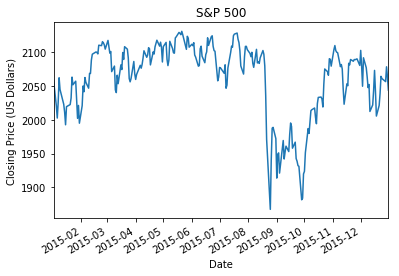

In [262]:
sp.Close.plot(title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

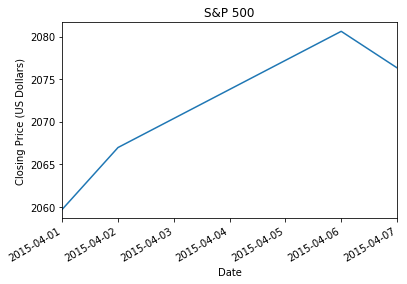

In [266]:
# One week
sp.loc['2015-4-1':'2015-4-7', 'Close'].plot(title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

### style: 
- 'k': color black (b: blue, g: green, r: red, c: cyan)
- '.': marker dot (o: circle, *: star, s: square, +: plus)
- '-': a hyphen means a solid line (:: dotted)

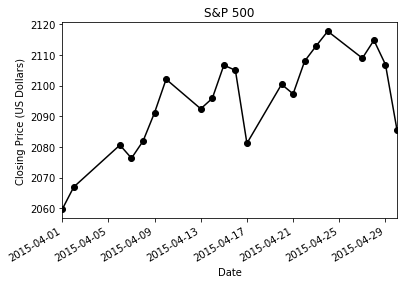

In [274]:
# plot(style='')
sp.loc['2015-4', 'Close'].plot(style='ko-', title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

### Area plot: kind = 'area'

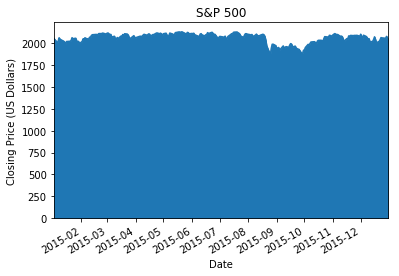

In [277]:
sp.Close.plot(kind='area', title='S&P 500')
plt.ylabel('Closing Price (US Dollars)')
plt.show()

### Plot multiple columns at once: subplots = True
The volume below is so much larger than the price we cannot see the latter at this scale. Therefore, we use subplots = True.

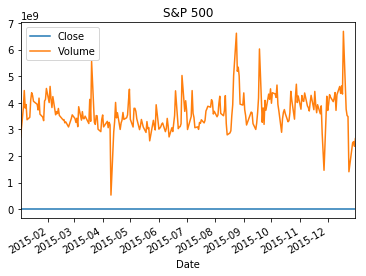

In [286]:
sp.loc['2015', ['Close', 'Volume']].plot(title='S&P 500')
plt.show()


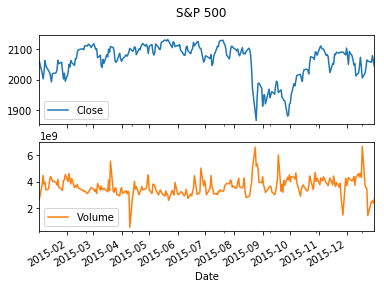

In [287]:
sp.loc['2015', ['Close', 'Volume']].plot(subplots=True, title='S&P 500')
plt.show()

# Practice 3: Plotting time series, datetime indexing

In [289]:
austin.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [294]:
austin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 593.7 KB


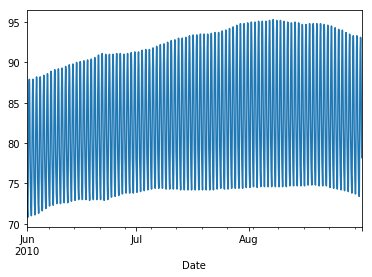

In [303]:
# Plot the summer data
austin.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()

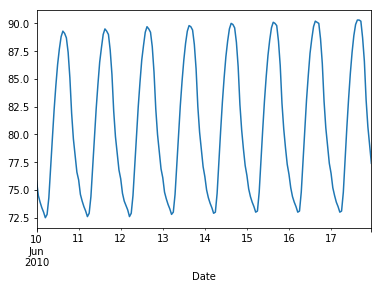

In [304]:
# Plot the one week data
austin.Temperature['2010-6-10':'2010-6-17'].plot()
plt.show()